# Proyecto 4

Integrantes: Bryan Martínez, Adriana Palacios, Esteban Cárcamo, y Nico Concua

Un concursante debe elegir 1 puerta entre 3 (todas cerradas); el premio consiste en llevarse lo que se encuentra detrás de la puerta elegida. Se sabe con certeza que tras una de ellas hay un premio, y tras las otras dos no hay premio.

Una vez que el concursante haya elegido una puerta y comunicado su elección a los presentes, el presentador, que sabe lo que hay detrás de cada puerta, abrirá una de las otras dos, en la que no habrá premio. A continuación, le da la opción al concursante de cambiar, si lo desea, de puerta.

## Problema 1

¿Debe el concursante mantener su elección original o escoger la otra puerta?

Se gana el premio 33374 veces al quedarse.
Se gana el premio 66626 veces al moverse de puerta.


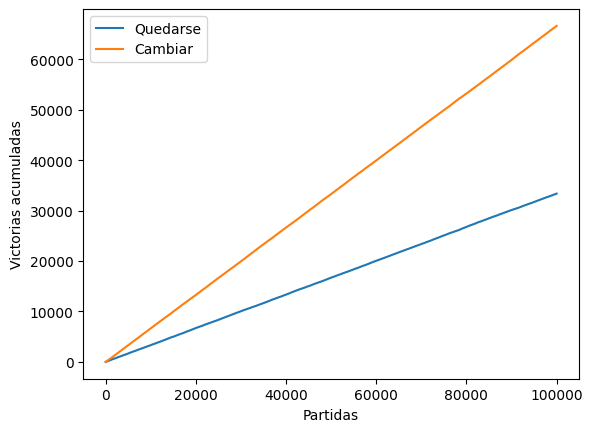

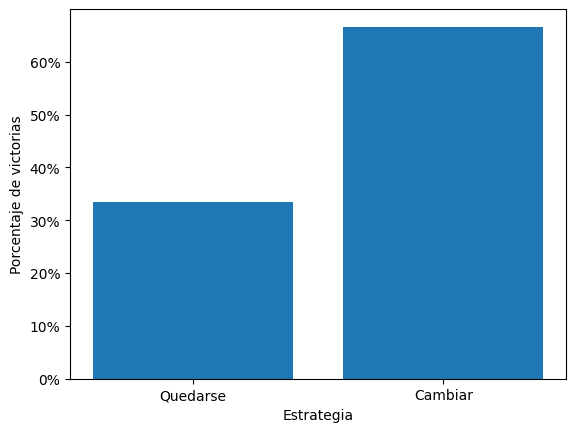

Se gana el 33% al quedarse.
Se gana el 67% al moverse de puerta.


In [ ]:
import random
import matplotlib.pyplot as plt

lista = []
random.seed(2025)

for i in range(100000):
    lista.append(random.random())

# si esta entre 0 y 1/3 se queda en la primera posición
# si esta entre 1/3 y 2/3 se queda en la segunda posición
# si esta entre 2/3 y 1 se queda en la tercera posición
resultados_quedarse = []
random.seed(2025)
for i in lista:
    posicion_premio = random.randint(0,2)
    eleccion = 0
    if i < 1/3:
        eleccion = 0
    elif i < 2/3:
        eleccion = 1
    else:
        eleccion = 2

    if eleccion == posicion_premio:
        resultados_quedarse.append(1)
    else:
        resultados_quedarse.append(0)

cantidad_ganando_quedarse = 0
for i in resultados_quedarse:
    if i == 1:
        cantidad_ganando_quedarse += 1

print("Se gana el premio " + str(cantidad_ganando_quedarse) + " veces al quedarse.")

# Estrategia de cambiar de lugar tras la elección
resultados_moverse = []
random.seed(2025)
for i in lista:
    posicion_premio = random.randint(0,2)
    eleccion = 0
    if i < 1/3:
        eleccion = 0
    elif i < 2/3:
        eleccion = 1
    else:
        eleccion = 2

    posicion_presentador = ({0, 1, 2} - {eleccion, posicion_premio}).pop()
    posicion_concursante = ({0, 1, 2} - {eleccion, posicion_presentador}).pop()

    if posicion_premio == posicion_concursante:
        resultados_moverse.append(1)
    else:
        resultados_moverse.append(0)
    

cantidad_ganando_moverse = 0
for i in resultados_moverse:
    if i == 1:
        cantidad_ganando_moverse += 1

print("Se gana el premio " + str(cantidad_ganando_moverse) + " veces al moverse de puerta.")

###########################################################################################################
# Grafico de victorias acumuladas
ganancias_quedarse = []
cant_ganados = 0
for i in resultados_quedarse:
    cant_ganados += i
    ganancias_quedarse.append(cant_ganados)

ganancias_cambiar = []
cant_ganados = 0
for i in resultados_moverse:
    cant_ganados += i
    ganancias_cambiar.append(cant_ganados)

plt.plot(ganancias_quedarse, label = "Quedarse")
plt.plot(ganancias_cambiar, label = "Cambiar")
plt.xlabel("Partidas")
plt.ylabel("Victorias acumuladas")
plt.legend()
plt.show()

# Porcentajes de victorias en grafico de barras
porcentaje_quedarse = cantidad_ganando_quedarse/100000
porcentaje_cambiar = (cantidad_ganando_moverse)/100000

plt.bar(["Quedarse", "Cambiar"], [porcentaje_quedarse, porcentaje_cambiar])
plt.xlabel("Estrategia")
plt.ylabel("Porcentaje de victorias")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x*100)))
plt.show()

print("Se gana el {:.0f}% al quedarse.".format(porcentaje_quedarse*100))
print("Se gana el {:.0f}% al moverse de puerta.".format(porcentaje_cambiar*100))


## Problema 2

¿Existe alguna diferencia en la estrategia si en lugar de 3 se tienen 5 puertas (1 con premio y 4 sin premio)?

Se gana el premio 20182 veces al quedarse.
Se gana el premio 79818 veces al moverse de puerta.


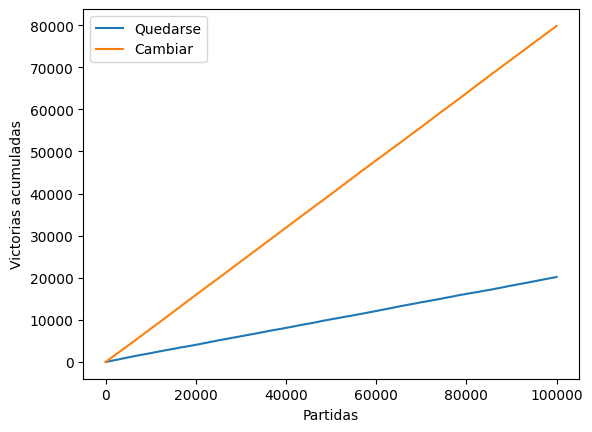

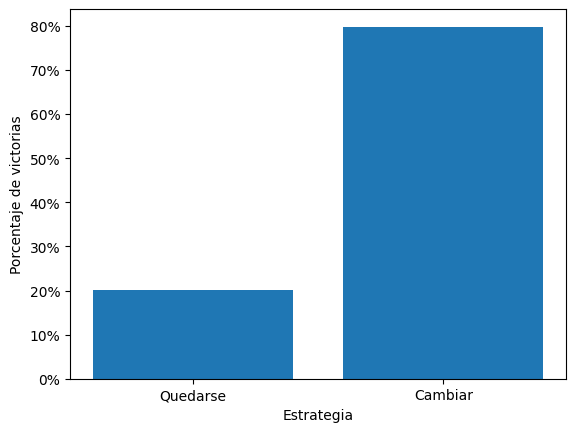

Se gana el 20% al quedarse.
Se gana el 80% al moverse de puerta.


In [ ]:
import random 
import matplotlib.pyplot as plt

#Generacion de números aleatorios 
lista = []
random.seed(2025)
for i in range (100000):
   lista.append(random.random())

#Estrategia de quedarse con la eleccion incial
resultados_quedarse = []
random.seed(2025)
for i in lista:
   posicion_premio = random.randint (0,4)

   #Elecciones
   if i < 1/5:
      eleccion = 0
   elif i < 2/5:
      eleccion = 1
   elif i < 3/5:
      eleccion = 2
   elif i < 4/5:
      eleccion = 3
   else:
      eleccion = 4

   #si la elección coincide con la posición del premio, gana
   if eleccion == posicion_premio:
      resultados_quedarse.append(1)
   else:
      resultados_quedarse.append(0)

cantidad_ganando_quedarse = 0
for i in resultados_quedarse:
   if i == 1:
      cantidad_ganando_quedarse += 1
   
print (f"Se gana el premio {cantidad_ganando_quedarse} veces al quedarse.")

#Estrategia de moverse de la eleccion incial
resultados_moverse = []
random.seed(2025)
for i in lista:
   posicion_premio = random.randint (0,4)

   #Elecciones
   if i < 1/5:
      eleccion = 0
   elif i < 2/5:
      eleccion = 1
   elif i < 3/5:
      eleccion = 2
   elif i < 4/5:
      eleccion = 3
   else:
      eleccion = 4

   #si el concursante elige la puerta con premio y cambia, pierde
   #si el concursante no elige la puerta con premio pierde
   if eleccion == posicion_premio:
      resultados_moverse.append(0) # Si eligió la correcta y cambia, pierde
   else:
      resultados_moverse.append(1) # Si eligió una incorrecta y cambia, gana

cantidad_ganando_moverse = 0
for i in resultados_moverse:
   if i == 1:
      cantidad_ganando_moverse += 1
   
print (f"Se gana el premio {cantidad_ganando_moverse} veces al moverse de puerta.")


# Gráficos de victorias acumuladas
ganancias_quedarse = []
cant_ganados = 0
for i in resultados_quedarse:
   cant_ganados += i
   ganancias_quedarse.append(cant_ganados)

ganancias_cambiar = []
cant_ganados = 0
for i in resultados_moverse:
   cant_ganados += i
   ganancias_cambiar.append(cant_ganados)

plt.plot(ganancias_quedarse, label="Quedarse")
plt.plot(ganancias_cambiar, label="Cambiar")
plt.xlabel("Partidas")
plt.ylabel("Victorias acumuladas")
plt.legend()
plt.show()

# Porcentajes de victorias en gráfico de barras
porcentaje_quedarse = cantidad_ganando_quedarse/100000
porcentaje_cambiar = cantidad_ganando_moverse/100000

plt.bar(["Quedarse", "Cambiar"], [porcentaje_quedarse, porcentaje_cambiar])
plt.xlabel("Estrategia")
plt.ylabel("Porcentaje de victorias")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x*100)))
plt.show()

print(f"Se gana el {porcentaje_quedarse*100:.0f}% al quedarse.")
print(f"Se gana el {porcentaje_cambiar*100:.0f}% al moverse de puerta.")

## Pregunta 2 pero modificada

5 puertas en total
1 elección inicial
El presentador abre las puertas secuencialmente (una por una)
Evaluamos las probabilidades en cada etapa del juego

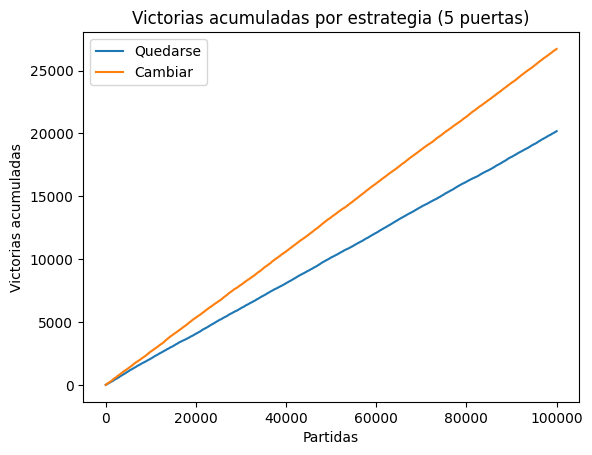

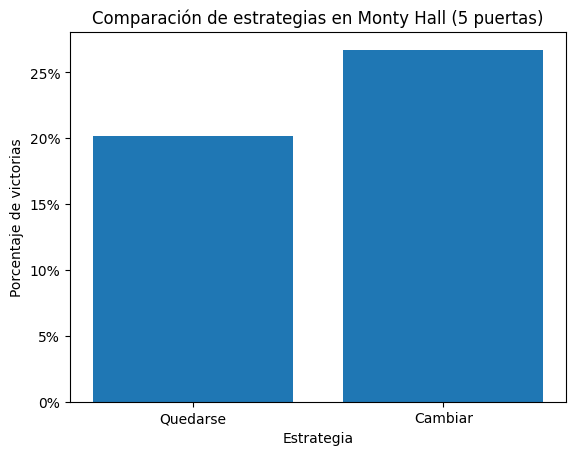

Estrategia de quedarse: 20182 victorias (20.18%)
Estrategia de cambiar: 26720 victorias (26.72%)


In [47]:
import random
import matplotlib.pyplot as plt

# Generación de números aleatorios
lista = []
random.seed(2025)
for i in range(100000):
   lista.append(random.random())

# Estrategia de quedarse con la elección inicial (5 puertas)
resultados_quedarse = []
random.seed(2025)
for i in lista:
   posicion_premio = random.randint(0, 4)

   # Elección del jugador
   if i < 1/5:
      eleccion = 0
   elif i < 2/5:
      eleccion = 1
   elif i < 3/5:
      eleccion = 2
   elif i < 4/5:
      eleccion = 3
   else:
      eleccion = 4

   if eleccion == posicion_premio:
      resultados_quedarse.append(1)
   else:
      resultados_quedarse.append(0)

cantidad_ganando_quedarse = sum(resultados_quedarse)

# Estrategia de cambiar después de que el presentador abre una puerta sin premio
resultados_moverse = []
random.seed(2025)
for i in lista:
   posicion_premio = random.randint(0, 4)

   if i < 1/5:
      eleccion = 0
   elif i < 2/5:
      eleccion = 1
   elif i < 3/5:
      eleccion = 2
   elif i < 4/5:
      eleccion = 3
   else:
      eleccion = 4

   # El presentador abre una puerta incorrecta distinta a la elección y al premio
   opciones_presentador = [j for j in range(5) if j != eleccion and j != posicion_premio]
   puerta_abierta = random.choice(opciones_presentador)

   # El jugador cambia a una de las otras 3 puertas restantes
   opciones_restantes = [j for j in range(5) if j != eleccion and j != puerta_abierta]
   nueva_eleccion = random.choice(opciones_restantes)

   if nueva_eleccion == posicion_premio:
      resultados_moverse.append(1)
   else:
      resultados_moverse.append(0)

cantidad_ganando_moverse = sum(resultados_moverse)


# Gráficos de victorias acumuladas
ganancias_quedarse = []
cant_ganados = 0
for i in resultados_quedarse:
   cant_ganados += i
   ganancias_quedarse.append(cant_ganados)

ganancias_cambiar = []
cant_ganados = 0
for i in resultados_moverse:
   cant_ganados += i
   ganancias_cambiar.append(cant_ganados)

plt.plot(ganancias_quedarse, label="Quedarse")
plt.plot(ganancias_cambiar, label="Cambiar")
plt.xlabel("Partidas")
plt.ylabel("Victorias acumuladas")
plt.title("Victorias acumuladas por estrategia (5 puertas)")
plt.legend()
plt.show()

# Porcentajes de victorias en gráfico de barras
porcentaje_quedarse = cantidad_ganando_quedarse / 100000
porcentaje_cambiar = cantidad_ganando_moverse / 100000

plt.bar(["Quedarse", "Cambiar"], [porcentaje_quedarse, porcentaje_cambiar])
plt.xlabel("Estrategia")
plt.ylabel("Porcentaje de victorias")
plt.title("Comparación de estrategias en Monty Hall (5 puertas)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}%".format(x * 100)))
plt.show()

# Mejor presentación de resultados en consola
print(f"Estrategia de quedarse: {cantidad_ganando_quedarse} victorias ({porcentaje_quedarse * 100:.2f}%)")
print(f"Estrategia de cambiar: {cantidad_ganando_moverse} victorias ({porcentaje_cambiar * 100:.2f}%)")




